In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100


In [3]:
with open('./overs_data.json') as file:
    overs_dict = json.loads(file.read())

In [68]:
overs_dict['2022']['Mumbai Indians'][0]['innings'][4]

{'over': 4,
 'deliveries': [{'batter': 'RR Pant',
   'bowler': 'TS Mills',
   'extras': {'wides': 1},
   'non_striker': 'PP Shaw',
   'runs': {'batter': 0, 'extras': 1, 'total': 1}},
  {'batter': 'RR Pant',
   'bowler': 'TS Mills',
   'non_striker': 'PP Shaw',
   'runs': {'batter': 0, 'extras': 0, 'total': 0},
   'wickets': [{'player_out': 'RR Pant',
     'fielders': [{'name': 'TH David'}],
     'kind': 'caught'}]},
  {'batter': 'Lalit Yadav',
   'bowler': 'TS Mills',
   'non_striker': 'PP Shaw',
   'runs': {'batter': 1, 'extras': 0, 'total': 1}},
  {'batter': 'PP Shaw',
   'bowler': 'TS Mills',
   'non_striker': 'Lalit Yadav',
   'runs': {'batter': 6, 'extras': 0, 'total': 6}},
  {'batter': 'PP Shaw',
   'bowler': 'TS Mills',
   'non_striker': 'Lalit Yadav',
   'runs': {'batter': 0, 'extras': 0, 'total': 0}},
  {'batter': 'PP Shaw',
   'bowler': 'TS Mills',
   'non_striker': 'Lalit Yadav',
   'runs': {'batter': 1, 'extras': 0, 'total': 1}},
  {'batter': 'Lalit Yadav',
   'bowler': 'TS

In [4]:
def bat_details():
    x = []
    for i in range(0, 20):
        x.append({'runs': 0, 'balls': 0, 'outs': 0})
    return x

def bowl_details():
    y = []
    for i in range(0, 20):
        y.append({'runs': 0, 'extras': 0, 'wickets': 0, 'balls': 0})
    return y


In [5]:
batting_dict = {}
bowling_dict = {}
fielding_dict = {}
for season, season_data in overs_dict.items():
    for team, matches in season_data.items():
        for match in matches:
            for over in match['innings']:
                over_num = over['over']
                for delivery in over['deliveries']:
                    batter = delivery['batter']
                    bowler = delivery['bowler']
                    runs = delivery['runs']['batter']
                    extras = delivery['runs']['extras']
                    total = delivery['runs']['total']

                    batting_dict.setdefault(season, {})
                    bowling_dict.setdefault(season, {})
                    batting_dict[season].setdefault(batter, bat_details())
                    bowling_dict[season].setdefault(bowler, bowl_details())


                    batting_dict[season][batter][over_num]['runs'] += runs
                    batting_dict[season][batter][over_num]['balls'] += 1

                    bowling_dict[season][bowler][over_num]['runs'] += total
                    bowling_dict[season][bowler][over_num]['extras'] += extras
                    bowling_dict[season][bowler][over_num]['balls'] += 1

                    try:
                        for wicket in delivery['wickets']:
                            batter = wicket['player_out']
                            batting_dict[season].setdefault(batter, bat_details())
                            batting_dict[season][batter][over_num]['outs'] += 1

                            bowling_dict[season][bowler][over_num]['wickets'] += 1

                            fielder = wicket['fielders'][0]['name']
                            kind = wicket['kind']
                            fielding_dict.setdefault(season, {})
                            fielding_dict[season].setdefault(fielder, {})
                            fielding_dict[season][fielder].setdefault('caught', 0)
                            fielding_dict[season][fielder].setdefault('run_out', 0)
                            fielding_dict[season][fielder][kind] += 1
                            
                    except KeyError:
                        pass



In [6]:
with open('./over_wise_bowling.json','w', newline='') as file:
    file.write(json.dumps(bowling_dict))

with open('./over_wise_batting.json','w', newline='') as file:
    file.write(json.dumps(batting_dict))

with open('./fielding.json', 'w', newline='') as file:
    file.write(json.dumps(fielding_dict))


In [7]:
# Read players registry data

with open('./registry.json') as file:
    registry = json.loads(file.read())

In [8]:
teams = set()
for player, team in registry['2022'].items():
    teams.add(team)

In [9]:
team_color_code = {'Chennai Super Kings':'yellow',
                   'Delhi Capitals' : 'teal',
                   'Gujarat Titans' : 'grey',
                   'Kolkata Knight Riders' : 'black',
                   'Lucknow Super Giants' : 'cyan',
                   'Mumbai Indians' : 'blue',
                   'Punjab Kings' : 'red',
                   'Rajasthan Royals' : 'pink',
                   'Royal Challengers Bangalore' : 'magenta',
                   'Sunrisers Hyderabad' : 'orange'}


In [10]:
with open('./team_color_code.json', 'w') as file:
    file.write(json.dumps(team_color_code))

In [17]:
def batting_details_over_wise(season='2022', start_over=0, end_over=6):
    runs = {}
    balls = {}
    outs = {}
    avg = {}
    sr = {}
    for batter, batter_data in batting_dict[season].items():
        runs.setdefault(batter, 0)
        balls.setdefault(batter, 0)
        outs.setdefault(batter, 0)
        for over in range(start_over, end_over):
            runs[batter] += batter_data[over]['runs']
            balls[batter] += batter_data[over]['balls']
            outs[batter] += batter_data[over]['outs']


    for batter in balls:
        try:
            x = runs[batter]/outs[batter]
        except ZeroDivisionError:
            x = runs[batter]
        
        try:
            y = runs[batter]/balls[batter]
        except ZeroDivisionError:
            y = runs[batter]
            
        avg[batter] = x
        sr[batter] = y*100

    return runs, balls, outs, avg, sr


In [26]:
def bowling_details_over_wise(season = '2022', start_over = 0, end_over = 6):
    runs = {}
    extras = {}
    wickets = {}
    balls = {}
    avg = {}
    econ = {}
    for bowler , bowler_data in bowling_dict[season].items():
        runs.setdefault(bowler, 0)
        extras.setdefault(bowler, 0)
        wickets.setdefault(bowler, 0)
        balls.setdefault(bowler, 0)
        for over in range(start_over, end_over):
            runs[bowler] += bowler_data[over]['runs']
            extras[bowler] += bowler_data[over]['extras']
            wickets[bowler] += bowler_data[over]['wickets']
            balls[bowler] += bowler_data[over]['balls']

    for bowler in runs:
        if not wickets[bowler]:
            x = runs[bowler]
        else:
            x = runs[bowler]/wickets[bowler]
        
        if not balls[bowler]:
            y = runs[bowler]
        else:
            y = runs[bowler]/(balls[bowler]/6)

        avg[bowler] = x
        econ[bowler] = y

    return runs, extras, wickets, balls, avg, econ


In [19]:
get_overs = lambda : [0]*20

In [20]:
# Save Batting details
batting_stats_over_wise = {}
for season in range(2008, 2023):
    batting_stats_over_wise.setdefault(season, {})
    for batter in batting_dict[str(season)]:
        batting_stats_over_wise[season].setdefault(batter, get_overs())

    for over in range(0, 20):
        runs, balls, outs, avg, sr = batting_details_over_wise(season=str(season), start_over=over, end_over=over+1)

        for batter in runs:
            stats = {
                'runs': runs[batter],
                'balls': balls[batter],
                'outs': outs[batter],
                'avg': avg[batter],
                'sr': sr[batter]
            }
            batting_stats_over_wise[season][batter][over] = stats

with open('batting_over_wise_stats.json', 'w') as file:
    file.write(json.dumps(batting_stats_over_wise))

In [31]:
# Save Bowling details
bowling_stats_over_wise = {}
for season in range(2008, 2023):
    bowling_stats_over_wise.setdefault(season, {})
    for bowler in batting_dict[str(season)]:
        bowling_stats_over_wise[season].setdefault(bowler, get_overs())

    for over in range(0, 20):
        runs, extras, wickets, balls, avg, econ = bowling_details_over_wise(
            season=str(season), start_over=over, end_over=over+1)

        for bowler in runs:
            stats = {
                'runs': runs[bowler],
                'balls': balls[bowler],
                'wickets': wickets[bowler],
                'avg': avg[bowler],
                'econ': econ[bowler],
                'extras': extras[bowler]
            }
            try:
                bowling_stats_over_wise[season][bowler][over] = stats
            except KeyError:
                pass

with open('batting_over_wise_stats.json', 'w') as file:
    file.write(json.dumps(bowling_stats_over_wise))


In [25]:
batting_stats_over_wise[2013]['CH Gayle']

[{'runs': 50, 'balls': 55, 'outs': 0, 'avg': 50, 'sr': 90.9090909090909},
 {'runs': 60, 'balls': 47, 'outs': 3, 'avg': 20.0, 'sr': 127.65957446808511},
 {'runs': 46, 'balls': 34, 'outs': 0, 'avg': 46, 'sr': 135.29411764705884},
 {'runs': 22, 'balls': 28, 'outs': 2, 'avg': 11.0, 'sr': 78.57142857142857},
 {'runs': 82, 'balls': 35, 'outs': 0, 'avg': 82, 'sr': 234.2857142857143},
 {'runs': 25, 'balls': 21, 'outs': 1, 'avg': 25.0, 'sr': 119.04761904761905},
 {'runs': 42, 'balls': 31, 'outs': 3, 'avg': 14.0, 'sr': 135.48387096774192},
 {'runs': 48, 'balls': 20, 'outs': 0, 'avg': 48, 'sr': 240.0},
 {'runs': 33, 'balls': 20, 'outs': 0, 'avg': 33, 'sr': 165.0},
 {'runs': 22, 'balls': 21, 'outs': 0, 'avg': 22, 'sr': 104.76190476190477},
 {'runs': 34, 'balls': 19, 'outs': 0, 'avg': 34, 'sr': 178.94736842105263},
 {'runs': 29, 'balls': 26, 'outs': 1, 'avg': 29.0, 'sr': 111.53846153846155},
 {'runs': 27, 'balls': 26, 'outs': 0, 'avg': 27, 'sr': 103.84615384615385},
 {'runs': 26, 'balls': 22, 'outs

In [41]:
bowling_stats_over_wise[2022]['HV Patel']

[{'runs': 0, 'balls': 0, 'wickets': 0, 'avg': 0, 'econ': 0, 'extras': 0},
 {'runs': 0, 'balls': 0, 'wickets': 0, 'avg': 0, 'econ': 0, 'extras': 0},
 {'runs': 0, 'balls': 0, 'wickets': 0, 'avg': 0, 'econ': 0, 'extras': 0},
 {'runs': 0, 'balls': 0, 'wickets': 0, 'avg': 0, 'econ': 0, 'extras': 0},
 {'runs': 9, 'balls': 6, 'wickets': 0, 'avg': 9, 'econ': 9.0, 'extras': 0},
 {'runs': 0, 'balls': 0, 'wickets': 0, 'avg': 0, 'econ': 0, 'extras': 0},
 {'runs': 27,
  'balls': 30,
  'wickets': 1,
  'avg': 27.0,
  'econ': 5.4,
  'extras': 0},
 {'runs': 27,
  'balls': 19,
  'wickets': 2,
  'avg': 13.5,
  'econ': 8.526315789473685,
  'extras': 5},
 {'runs': 15,
  'balls': 12,
  'wickets': 1,
  'avg': 15.0,
  'econ': 7.5,
  'extras': 0},
 {'runs': 8,
  'balls': 13,
  'wickets': 1,
  'avg': 8.0,
  'econ': 3.6923076923076925,
  'extras': 1},
 {'runs': 23, 'balls': 12, 'wickets': 0, 'avg': 23, 'econ': 11.5, 'extras': 0},
 {'runs': 46,
  'balls': 38,
  'wickets': 2,
  'avg': 23.0,
  'econ': 7.26315789473

In [56]:
# Make a Scatter chart for all players who have faced x no. of balls 

def avg_vs_sr(season = '2022', start_over=0, end_over=6,lim = 100, show_graph=False):
    runs, balls, outs, avgs, srs = batting_details_over_wise(season = season, start_over=start_over, end_over=end_over)
    names = []
    avg = []
    sr = []
    sizes = []
    colors = []
    for batter in balls:
        if balls[batter] >= lim:
            avg.append(avgs[batter])
            sr.append(srs[batter])
            names.append(batter)
            sizes.append(runs[batter]*1.5)
            colors.append(team_color_code[registry['2022'][batter]])

    if show_graph:
        for name in names:
            plt.annotate(name, (avgs[name], srs[name]))
        plt.scatter(avg, sr, s = sizes,c = colors, alpha=0.6)     
        plt.xlabel('Average')
        plt.ylabel('Strike Rate')
        plt.title(f'Season: {season}, Overs: {start_over} to {end_over}')
        plt.show()

## Batting Stats

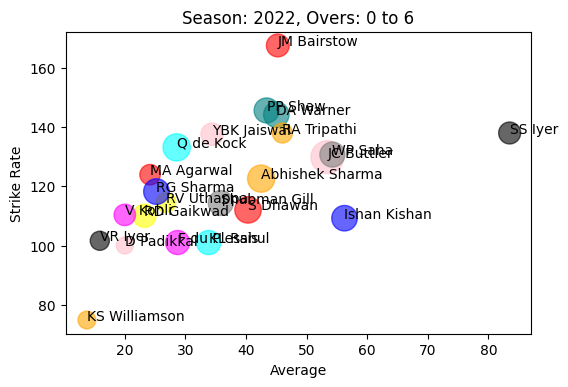

In [45]:
# Powerplays
avg_vs_sr(show_graph=True)

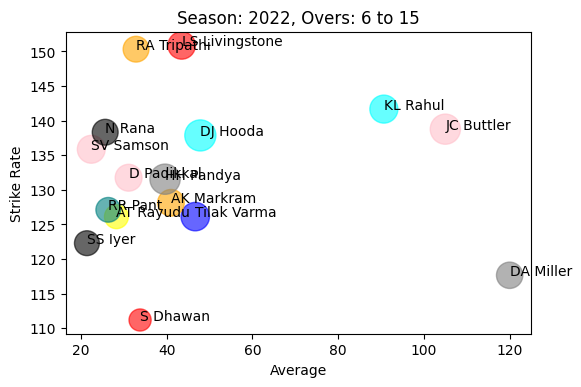

In [46]:
# middle Overs
avg_vs_sr(show_graph=True, start_over=6, end_over=15, lim=150)

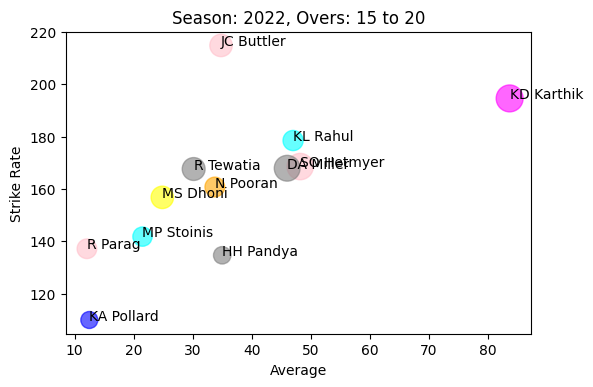

In [47]:
# end Overs
avg_vs_sr(show_graph=True, start_over=15, end_over=20, lim=75)

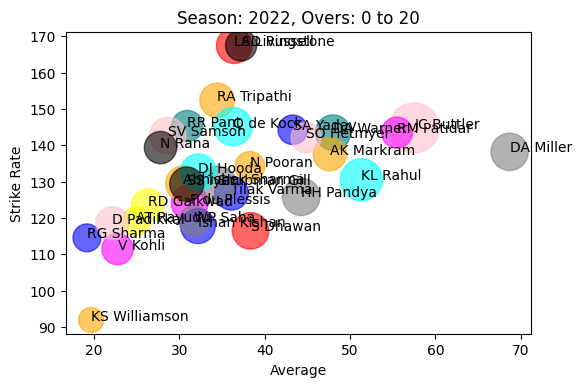

In [50]:
# Whole Match
avg_vs_sr(show_graph=True, start_over=0, end_over=20, lim=200)


## Bowling Data

In [67]:
def avg_vs_econ(season='2022', start_over=0, end_over=6, lim=100, show_graph=False):
    runs, extras, wickets,balls, avgs, econs = bowling_details_over_wise(
        season=season, start_over=start_over, end_over=end_over)
    names = []
    avg = []
    econ = []
    sizes = []
    colors = []
    for bowler in runs:
        if balls[bowler] >= lim:
            avg.append(avgs[bowler])
            econ.append(econs[bowler])
            names.append(bowler)
            sizes.append(wickets[bowler]*20)
            colors.append(team_color_code[registry['2022'][bowler]])

    if show_graph:
        for name in names:
            plt.annotate(name, (avgs[name], econs[name]))
        plt.scatter(avg, econ, s=sizes, c=colors, alpha=0.6)
        plt.xlabel('Average')
        plt.ylabel('Economy')
        plt.title(f'Season: {season}, Overs: {start_over} to {end_over}')
        plt.show()


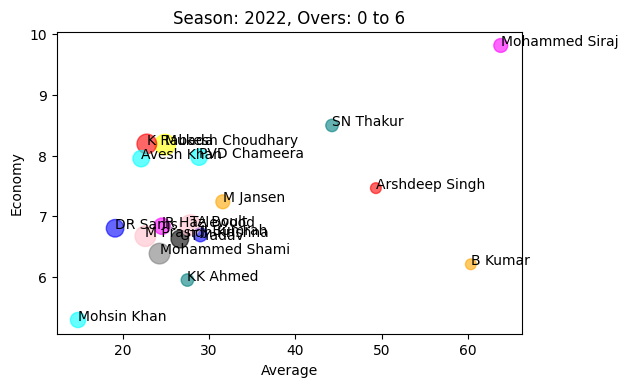

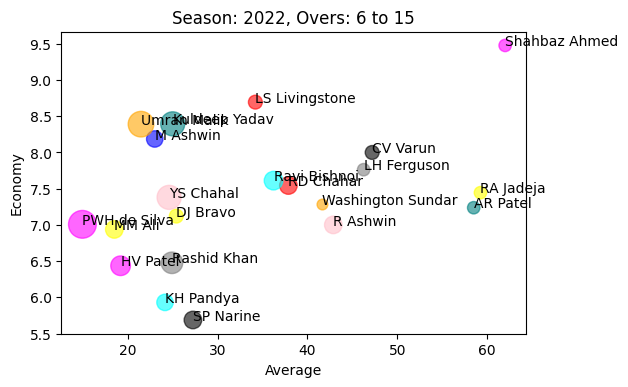

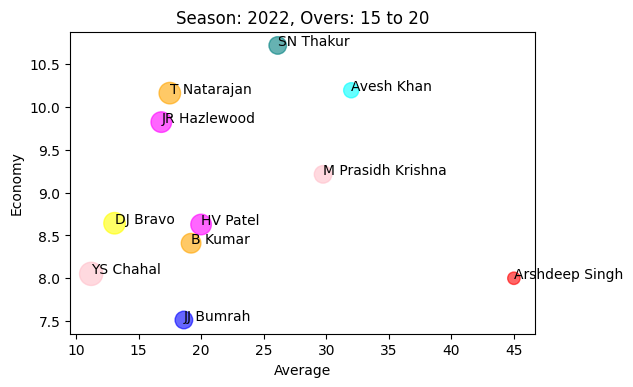

In [69]:
# powerplay
avg_vs_econ(show_graph=True)

# Middle Overs
avg_vs_econ(start_over=6, end_over=15, show_graph=True)

#Death Overs
avg_vs_econ(start_over=15, end_over=20, show_graph=True)

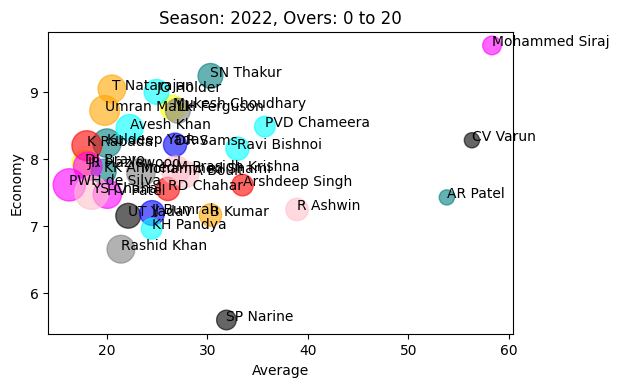

In [73]:
#Whole Match
avg_vs_econ(start_over=0, end_over=20,lim = 225, show_graph=True)

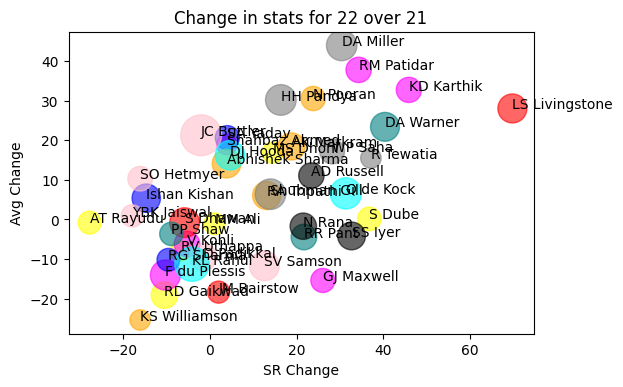

In [84]:
# Scatter plot for changes in Avg and Sr over the prev year
runs, balls, outs, avgs21, srs21 = batting_details_over_wise(season='2021', start_over=0, end_over=20)
runs, balls, outs, avgs22, srs22 = batting_details_over_wise(season='2022', start_over=0, end_over=20)
avgs = []
srs = []
names = []
sizes = []
colors = []
newbies = []
lim = 200
for batter in runs:
    if runs[batter] >= lim:
        try:
            avg_chng = avgs22[batter]-avgs21[batter]
            sr_chng = srs22[batter]-srs21[batter]
            avgs.append(avg_chng)
            srs.append(sr_chng)
            names.append(batter)
            sizes.append(runs[batter])
            colors.append(team_color_code[registry['2022'][batter]])
        except KeyError:
            newbies.append(batter)

for name, avg, sr in zip(names, avgs, srs):
    plt.annotate(name, (sr, avg))

plt.scatter(srs, avgs,  s = sizes, c = colors, alpha=0.6)
plt.xlabel('SR Change')
plt.ylabel('Avg Change')
plt.title('Change in stats for 22 over 21')
plt.show()

        


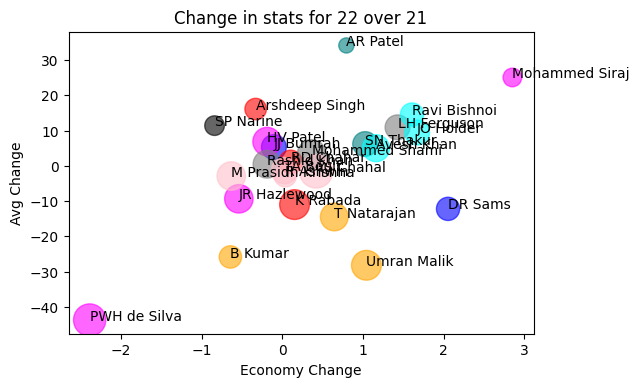

In [87]:
# Scatter plot for changes in Avg and Sr over the prev year
runs, extras, wickets, balls, avgs21, econ21 = bowling_details_over_wise(
    season='2021', start_over=0, end_over=20)
runs, extras, wickets, balls, avgs22, econ22 = bowling_details_over_wise(
    season='2022', start_over=0, end_over=20)
avgs = []
econs = []
names = []
sizes = []
colors = []
newbies = []
lim = 250
for bowler in balls:
    if balls[bowler] >= lim:
        try:
            avg_chng = avgs22[bowler]-avgs21[bowler]
            sr_chng = econ22[bowler]-econ21[bowler]
            avgs.append(avg_chng)
            econs.append(sr_chng)
            names.append(bowler)
            sizes.append(wickets[bowler]*20)
            colors.append(team_color_code[registry['2022'][bowler]])
        except KeyError:
            newbies.append(bowler)

for name, avg, econ in zip(names, avgs, econs):
    plt.annotate(name, (econ, avg))

plt.scatter(econs, avgs,  s=sizes, c=colors, alpha=0.6)
plt.xlabel('Economy Change')
plt.ylabel('Avg Change')
plt.title('Change in stats for 22 over 21')
plt.show()
